## Ensemble Methods

### Problem Statement: Build a model that predicts the loan status of the applicant considering different factors like Age, Income, Credit history etc

## Step1: Data Gathering

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/train_loan.csv'
df = pd.read_csv(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Step2: Perform basic data quality checks

In [3]:
df.shape

(58645, 13)

In [4]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
# missing values
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
# duplicated rows
df.duplicated().sum()

np.int64(0)

In [8]:
df=df.drop_duplicates()

## Step3: Separate X and Y features
Y => loan_status

In [9]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [10]:
X = df.drop(columns=['id','loan_status'])
Y = df[['loan_status']]

In [11]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [12]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


## Step4: Data Preprocessing and Data Cleaning

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [14]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [15]:
print(cat)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [16]:
print(con)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [18]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [19]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298


## Step6: SPlit the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [23]:
xtrain.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
49371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.074446,-0.264855,0.075506,0.140632,0.926666,0.335502,1.039036
33104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.754307,-0.923845,0.580588,-0.758041,0.023767,0.117378,-0.698298
53030,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.571697,0.156966,-0.177035,0.931464,-0.253034,0.444564,0.790845
54909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.091305,-0.370311,-0.177035,-0.578306,1.091428,-0.427932,0.294464
27249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.571697,-0.370311,0.075506,0.050765,-0.009185,0.335502,0.294464


In [24]:
ytrain.head()

,loan_status
49371,0
33104,1
53030,0
54909,0
27249,0


## Step7.1: Model Building
### Bagging model : Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

,n_estimators,5
,criterion,'gini'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
model.score(xtrain,ytrain)

0.9172776877824197

In [28]:
model.score(xtest,ytest)

0.9178105550345298

## Hyperparameter tuning- overfitting scenario, choose the best parameters required for the model

In [29]:
params = {
    'n_estimators':[5,10,35,50,75,100,150],
    'max_depth':[3,5,7,9,11]
}

To perform hyperparameter tuning, I am considering RandomSearchCV
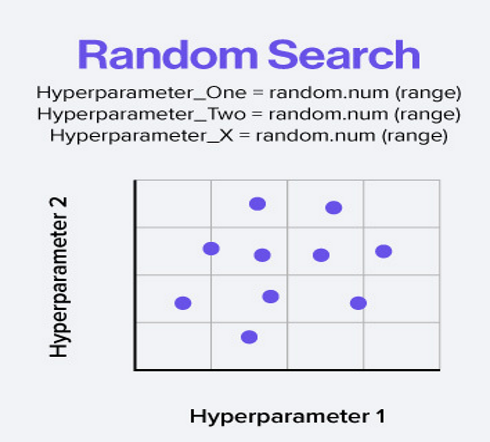

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
base_model = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [3, 5, ...], 'n_estimators': [5, 10, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [32]:
rscv.best_params_

{'n_estimators': 100, 'max_depth': 11}

In [33]:
rscv.best_score_

np.float64(0.8837088986922511)

In [34]:
best_rfc = rscv.best_estimator_

In [35]:
best_rfc.score(xtrain,ytrain)

0.9548554864012277

In [36]:
best_rfc.score(xtest,ytest)

0.9508056952851905

## Step8: Model Evaluation

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

In [38]:
ypred_test = model.predict(xtest)
ypred_test[:5]

array([0, 0, 0, 0, 1])

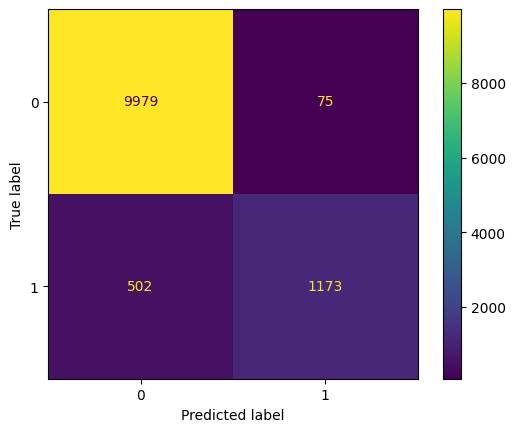

In [39]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     10054
           1       0.95      0.45      0.61      1675

    accuracy                           0.92     11729
   macro avg       0.93      0.72      0.78     11729
weighted avg       0.92      0.92      0.90     11729



## Let's build Gradient Boost and XGBoost. We shall choose the best model among these three

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gbc = GradientBoostingClassifier(
    n_estimators=5,
    learning_rate=0.01,
    max_depth=4,
    min_samples_leaf=3,
    min_samples_split=5
)
gbc.fit(xtrain,ytrain)

,loss,'log_loss'
,learning_rate,0.01
,n_estimators,5
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


*learning rate: 0.001 - 1*

In [44]:
gbc.score(xtrain,ytrain)

0.8577244436865888

In [45]:
gbc.score(xtest,ytest)

0.8571915764344786

### Hyperparameter tuning

In [46]:
params = {
    'n_estimators':[3,5,10,15,20,50,100],
    'learning_rate':[0.001,0.01,0.1,0.15],
    'max_depth':[3,4,5,6,7,8],
}

In [47]:
params

{'n_estimators': [3, 5, 10, 15, 20, 50, 100],
 'learning_rate': [0.001, 0.01, 0.1, 0.15],
 'max_depth': [3, 4, 5, 6, 7, 8]}

In [48]:
base_model2 = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(estimator=base_model2,param_distributions=params,cv=3,scoring='f1_macro')
rscv2.fit(xtrain,ytrain)

,estimator,GradientBoostingClassifier()
,param_distributions,"{'learning_rate': [0.001, 0.01, ...], 'max_depth': [3, 4, ...], 'n_estimators': [3, 5, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [49]:
rscv2.best_score_

np.float64(0.8892355300175803)

In [50]:
rscv2.best_params_

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.15}

In [51]:
best_gbc = rscv2.best_estimator_

In [52]:
best_gbc.score(xtrain,ytrain)

0.9593102566288686

In [53]:
best_gbc.score(xtest,ytest)

0.9519993179299173

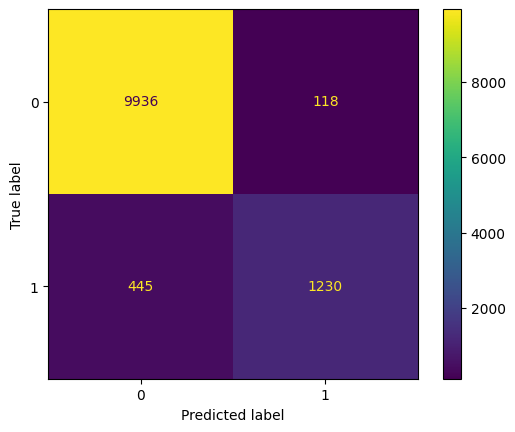

In [54]:
ConfusionMatrixDisplay.from_estimator(best_gbc,xtest,ytest)

In [55]:
ypred_test2 = best_gbc.predict(xtest)

In [56]:
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10054
           1       0.91      0.73      0.81      1675

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



**XGBOOST**

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Restart the kernel once this is done

## IFF you are getting error while installing XGboost
    cd .venv/scritps
    python.exe -m ensurepip 
    pip install xgboost

In [58]:
from xgboost import XGBClassifier

model3 = XGBClassifier(
    n_estimator=50,
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=4
)
model3.fit(xtrain,ytrain)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [60]:
model3.score(xtrain,ytrain)

0.9541094722482735

In [59]:
model3.score(xtest,ytest)

0.9529371642936312

HYperparameter tuning

In [61]:
params = {
    'n_estimator':[10,30,50,75,100,150],
    'max_depth':[5,7,10,15],
    'learning_rate':[0.001,0.01,0.015,0.1,0.15]
}

In [62]:
base_model3 = XGBClassifier()
rscv3 = RandomizedSearchCV(estimator=base_model3,param_distributions=params,cv=4,scoring='f1_macro')
rscv3.fit(xtrain,ytrain)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'learning_rate': [0.001, 0.01, ...], 'max_depth': [5, 7, ...], 'n_estimator': [10, 30, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [63]:
rscv3.best_score_

np.float64(0.8921145581177143)

In [64]:
rscv3.best_params_

{'n_estimator': 50, 'max_depth': 7, 'learning_rate': 0.15}

In [65]:
best_xgb = rscv3.best_estimator_

In [66]:
best_xgb.score(xtrain,ytrain)

0.9624648307613607

In [67]:
best_xgb.score(xtest,ytest)

0.9525961292522807

In [93]:
best_xgb.feature_importances_

array([0.01024289, 0.00497764, 0.03541902, 0.16424617, 0.04954607,
       0.00732367, 0.04074082, 0.04664135, 0.00840664, 0.01486469,
       0.00458649, 0.00739883, 0.06767469, 0.24554847, 0.09694527,
       0.0058941 , 0.        , 0.00530062, 0.        , 0.00659643,
       0.01937275, 0.01296745, 0.00585734, 0.03975509, 0.09508775,
       0.00460578], dtype=float32)

In [95]:
best_xgb.feature_names_in_

array(['cat__person_home_ownership_MORTGAGE',
       'cat__person_home_ownership_OTHER',
       'cat__person_home_ownership_OWN',
       'cat__person_home_ownership_RENT',
       'cat__loan_intent_DEBTCONSOLIDATION', 'cat__loan_intent_EDUCATION',
       'cat__loan_intent_HOMEIMPROVEMENT', 'cat__loan_intent_MEDICAL',
       'cat__loan_intent_PERSONAL', 'cat__loan_intent_VENTURE',
       'cat__loan_grade_A', 'cat__loan_grade_B', 'cat__loan_grade_C',
       'cat__loan_grade_D', 'cat__loan_grade_E', 'cat__loan_grade_F',
       'cat__loan_grade_G', 'cat__cb_person_default_on_file_N',
       'cat__cb_person_default_on_file_Y', 'con__person_age',
       'con__person_income', 'con__person_emp_length', 'con__loan_amnt',
       'con__loan_int_rate', 'con__loan_percent_income',
       'con__cb_person_cred_hist_length'], dtype='<U35')

In [94]:
best_xgb.classes_

array([0, 1])

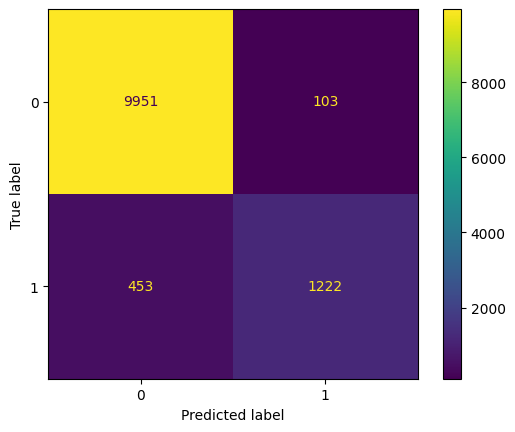

In [68]:
ConfusionMatrixDisplay.from_estimator(best_xgb,xtest,ytest)

In [69]:
ypred_test3 = best_xgb.predict(xtest)

In [70]:
print(classification_report(ytest,ypred_test3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10054
           1       0.92      0.73      0.81      1675

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



**ROC - Receiver Operator Characteristic: Showcases the TPR(true positive rate) vs False Positive rate over different thresholds. It helps in understanding whether the model is able to discriminate between the classes. THe model closer to left-most side, indicates high discrimination**

**AUC: Area Under Curve: Focuses on the area under the curve .It represents the probability that the model will rank a randomly chosen positive instance higher than negative instance. If the area is greater than 0.80, we are good to choose the model**

In [86]:
ytest['loan_status']

40062    0
30128    0
34643    0
39635    0
32787    1
        ..
42194    0
47036    0
43427    0
42222    1
12409    0
Name: loan_status, Length: 11729, dtype: int64

In [96]:
ypred_test[:5]

array([0, 0, 0, 0, 1])

In [97]:
ypred_test2[:5]

array([0, 0, 0, 0, 1])

In [98]:
ypred_test3[:5]

array([0, 0, 0, 0, 1])

In [87]:
model_results = {
    'Actual Y Data':ytest['loan_status'],
    'RandomForestClassifier':ypred_test,
    'GradientBoostingClassifier':ypred_test2,
    'XGBClassifier':ypred_test3
}
df_model_results = pd.DataFrame(model_results)
df_model_results

,Actual Y Data,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier
40062,0,0,0,0
30128,0,0,0,0
34643,0,0,0,0
39635,0,0,0,0
32787,1,1,1,1
...,...,...,...,...
42194,0,0,0,0
47036,0,0,0,0
43427,0,0,0,0
42222,1,0,1,1


In [99]:
df_model_results['RandomForestClassifier']

40062    0
30128    0
34643    0
39635    0
32787    1
        ..
42194    0
47036    0
43427    0
42222    0
12409    0
Name: RandomForestClassifier, Length: 11729, dtype: int64

In [100]:
df_model_results['GradientBoostingClassifier']

40062    0
30128    0
34643    0
39635    0
32787    1
        ..
42194    0
47036    0
43427    0
42222    1
12409    0
Name: GradientBoostingClassifier, Length: 11729, dtype: int64

In [101]:
df_model_results['XGBClassifier']

40062    0
30128    0
34643    0
39635    0
32787    1
        ..
42194    0
47036    0
43427    0
42222    1
12409    0
Name: XGBClassifier, Length: 11729, dtype: int64

In [89]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

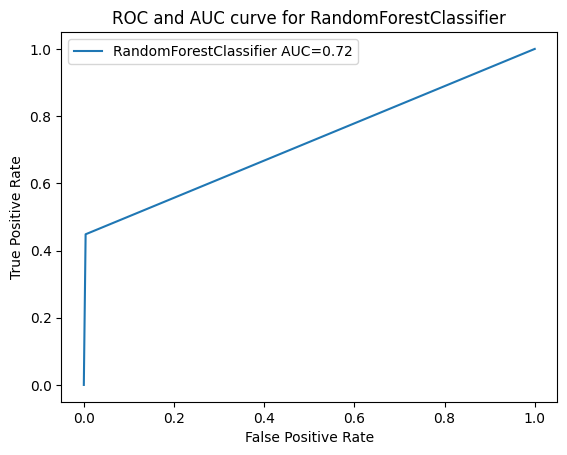

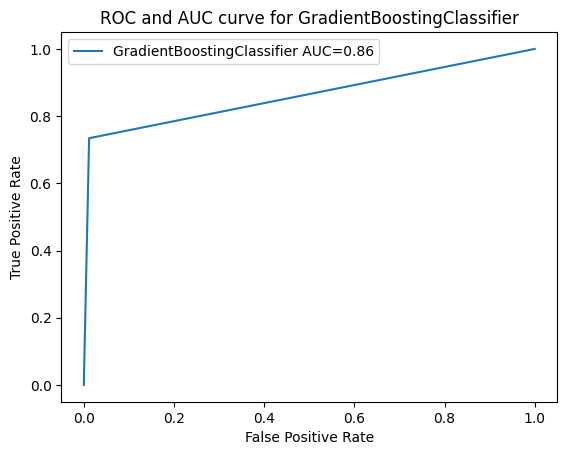

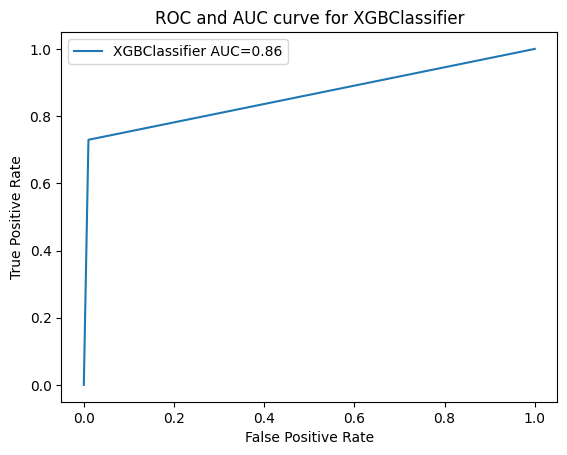

In [92]:
for model in ['RandomForestClassifier','GradientBoostingClassifier','XGBClassifier']:
    fpr,tpr,thresholds = roc_curve(ytest,df_model_results[model])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'{model} AUC={roc_auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC and AUC curve for {model}')
    plt.legend()
    plt.show()

## Final Model building: XGB classifier output looks good,. we can consider this for final model building

In [71]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0


In [72]:
path2 = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/test_loan.csv'
xnew = pd.read_csv(path2)
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [73]:
pre

,transformers,"[('cat', ...), ('con', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [74]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [75]:
xnew2 = xnew.drop(columns='id')
xnew2.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2


In [76]:
xnew_pre = pre.transform(xnew2)

In [77]:
xnew_pre.head(3)

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489


In [78]:
loan_status_predicted = best_xgb.predict(xnew_pre)

In [79]:
loan_status_predicted

array([1, 0, 1, ..., 0, 0, 1], shape=(39098,))

In [80]:
xnew['Predicted_Loan_Status'] = loan_status_predicted

In [81]:
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Predicted_Loan_Status
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0


In [82]:
xnew.to_csv('Predicted Loan Results.csv',index=False)